In [1]:
pip install tensorflow


In [2]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,MaxPooling2D, ZeroPadding2D
from keras import optimizers


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
input_size=(150,150,3)
image_width = 150
image_height = 150
batch_size = 16
epochs = 2
train_data_dir='/content/drive/MyDrive/dataset/dogscats/train'
valid_data_dir='/content/drive/MyDrive/dataset/dogscats/valid'

In [5]:
#Augmentation of Image is done in this cell
train_datagen=ImageDataGenerator( rescale=1./255,rotation_range=30,  width_shift_range = 0.3, height_shift_range = 0.3,
                                 horizontal_flip=True, fill_mode = 'nearest')
valid_datagen=ImageDataGenerator( rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size =(image_width, image_height),
                                                    batch_size=batch_size, class_mode='binary', shuffle=True)
valid_generator = valid_datagen.flow_from_directory(valid_data_dir, target_size =(image_width, image_height),
                                                    batch_size=batch_size, class_mode='binary', shuffle=True)


Found 23031 images belonging to 2 classes.
Found 2010 images belonging to 2 classes.


In [7]:
#creating of CNN model
model=Sequential()

model.add(Conv2D(128,(3,3),input_shape=input_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

In [8]:

#after creating CNN model we will create Fully connected layer
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(16))
model.add(Activation('relu'))

model.add(Dense(8))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 128)     3584      
                                                                 
 activation (Activation)     (None, 148, 148, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        73792     
                                                                 
 activation_1 (Activation)   (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                   

In [10]:
history=model.fit(train_generator, steps_per_epoch = 23031//batch_size, epochs=10,
                  validation_data= valid_generator, validation_steps= 2010//batch_size)


Epoch 1/10
1439/1439 [==============================] - 1905s 1s/step - loss: 0.6933 - accuracy: 0.4987 - val_loss: 0.6932 - val_accuracy: 0.4975
Epoch 2/10
1439/1439 [==============================] - 225s 156ms/step - loss: 0.6932 - accuracy: 0.4969 - val_loss: 0.6932 - val_accuracy: 0.4970
Epoch 3/10
1439/1439 [==============================] - 236s 164ms/step - loss: 0.6932 - accuracy: 0.4982 - val_loss: 0.6931 - val_accuracy: 0.5020
Epoch 4/10
1439/1439 [==============================] - 230s 160ms/step - loss: 0.6932 - accuracy: 0.4966 - val_loss: 0.6931 - val_accuracy: 0.5035
Epoch 5/10
1439/1439 [==============================] - 236s 164ms/step - loss: 0.6932 - accuracy: 0.4956 - val_loss: 0.6931 - val_accuracy: 0.5035
Epoch 6/10
1439/1439 [==============================] - 236s 164ms/step - loss: 0.6932 - accuracy: 0.4962 - val_loss: 0.6932 - val_accuracy: 0.4970
Epoch 7/10
1439/1439 [==============================] - 237s 165ms/step - loss: 0.6932 - accuracy: 0.4947 - val_lo

In [11]:
model.save('/content/drive/MyDrive/dataset/dogscats/cat_dog_basic_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


(1, 150, 150, 3)
1/1 [==============================] - 8s 8s/step
[[0.5573064]]
[[0.5573064]]
this is cat


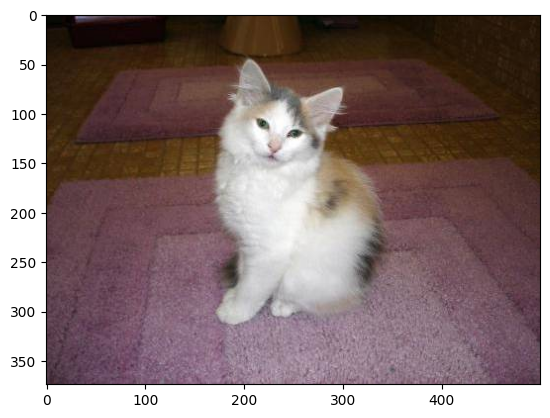

In [1]:
import numpy as np
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img
from tensorflow.keras import models
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img

image_path = '/content/drive/MyDrive/dataset/dogscats/test1/10.jpg'
model = models.load_model('/content/drive/MyDrive/dataset/dogscats/cat_dog_basic_model.h5')
test_image = load_img(image_path,target_size = (150,150,3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
print(test_image.shape)
result = model.predict(test_image)
print(result)
print(result)
if result[0][0] == 1:
  print("This is dog")
else:
  print("this is cat")
  # reading the image
testImage = img.imread(image_path)

# displaying the modified image
plt.imshow(testImage)